# Project: Controlling the altitude of a rocket
<center><img src="https://drive.google.com/uc?export=view&id=1GQ9CYDYWbSX0lGm4U6B_bkMWjCUyY2Of"></center>

- **Goal:** Maintain the rocket close (within 1000m) of a 30,000m altitude for as long as possible with the amount of fuel provided.

In [2]:
# You don't need to understand this. This just defines some things that we use below.

import matplotlib.pyplot as plt

def clear_log():
    global logged_data
    logged_data = {}
    
def log_data(t, **kwargs):
    kwargs["time"] = t
    for name, val in kwargs.items():
        logged_data.setdefault(name, []).append(val)
    
def plot(name):
    plt.xlabel("time")
    plt.ylabel(name)
    plt.plot(logged_data["time"], logged_data[name])

def input_number(prompt):
    while True:
        s = input(prompt)
        try:
            return float(s)
        except ValueError:
            print("That wasn't a valid number, try again.")

# Task #1: Run code to create plots and set up to run the rocket
Run the code below (hit the "play" button) to prepare the plots. Then move on to Task #2!

<u>Video for Task #1</u>

Ideas for assignments:

- Diagram of dependencies
- Explain what quantities are being added/subtracted and why?
- Hypothetical scenarios
  - What happens if the engine power is 1?
  - What happens if...
- This is in meters currently. If meters are weird, we could change to feet...

In [13]:
timestep = 1 # seconds

def fly_rocket():
    altitude = 0
    upward_speed = 0
    fuel_amount = 1000
    engine_power = 0
    time = 0

    clear_log()

    while (altitude > 0 or fuel_amount > 0) and time <= 2000:
        engine_power = control_engine(time, altitude, upward_speed, fuel_amount)
        
        for i in range(30):
            if engine_power < 0 or engine_power > 1:
                engine_power = 0
                print("Engine power must be between zero and one, assuming engine off")
                
            fuel_amount = fuel_amount + timestep * (-engine_power)
            
            if fuel_amount <= 0:
                fuel_amount = 0
                engine_power = 0
                
            altitude = altitude + timestep * upward_speed
            if altitude < 0:
                altitude = 0
            
            upward_speed = upward_speed + timestep * (
                14*engine_power # acceleration from engine
                - 9.81 # gravity
                - 0.0005*upward_speed*abs(upward_speed)) # air drag

            time = time + timestep * 1

            log_data(time,
                    engine_power=engine_power,
                    altitude=altitude,
                    upward_speed=upward_speed,
                    fuel_amount=fuel_amount)

print("Rocket simulation code defined!")

Rocket simulation code defined!


In [14]:
import matplotlib.pyplot as plt

def summarize_flight():
    plt.figure(figsize=(8*2, 6*2))
    plt.subplot(221)
    plot("altitude")
    plt.grid()

    plt.subplot(222)
    plot("fuel_amount")
    plt.grid()

    plt.subplot(223)
    plot("engine_power")
    plt.grid()

    plt.subplot(224)
    plot("upward_speed")
    plt.grid()

    good_times = [alt for alt in logged_data["altitude"] if abs(30_000 - alt) < 1000]
    print(f"Stayed within 1,000 m of 30,000 m for {len(good_times)*timestep:.1f} seconds.")    

print("Flight summary function prepared!")

Flight summary function prepared!


#Task #2: Manually control the rocket

The goal is to reach an altitude of 30,000 feet and remain there as long as possible. At each time step, you will be presented with the current information and asked what power to run the engine at. Run the code below!

<u>Video for Task #2</u>

*Optional: Watch <u>this video</u> if you are interested in listening to what each line of code is actually doing.*

In [16]:
# This is the manual controller with user input each step
def control_engine(time, altitude, upward_speed, fuel_amount):
    print(f"Time: {time:.2f} s - Altitude: {altitude:.2f} m - Speed: {upward_speed:.2f} m/s - Fuel: {fuel_amount:.2f}")
    return float(input_number("Engine power? (0-1)"))

fly_rocket()

Time: 0.00 s - Altitude: 0.00 m - Speed: 0.00 m/s - Fuel: 1000.00
Engine power? (0-1)1
Time: 30.00 s - Altitude: 1458.13 m - Speed: 81.22 m/s - Fuel: 970.00
Engine power? (0-1)1
Time: 60.00 s - Altitude: 4094.87 m - Speed: 90.93 m/s - Fuel: 940.00
Engine power? (0-1)1
Time: 90.00 s - Altitude: 6834.78 m - Speed: 91.51 m/s - Fuel: 910.00
Engine power? (0-1)1
Time: 120.00 s - Altitude: 9580.70 m - Speed: 91.54 m/s - Fuel: 880.00
Engine power? (0-1)1
Time: 150.00 s - Altitude: 12326.95 m - Speed: 91.54 m/s - Fuel: 850.00
Engine power? (0-1)0
Time: 180.00 s - Altitude: 10981.81 m - Speed: -129.14 m/s - Fuel: 850.00
Engine power? (0-1)0
Time: 210.00 s - Altitude: 6858.47 m - Speed: -139.95 m/s - Fuel: 850.00
Engine power? (0-1)0
Time: 240.00 s - Altitude: 2657.20 m - Speed: -140.07 m/s - Fuel: 850.00
Engine power? (0-1)
That wasn't a valid number, try again.
Engine power? (0-1)0
Time: 270.00 s - Altitude: 0.00 m - Speed: -140.07 m/s - Fuel: 850.00


KeyboardInterrupt: ignored

1**Question**: How did you do controlling the rocket? Run the code below to tell you how many seconds you kept the rocket within 1000 meters of the 30,000 meter altitude goal.

Stayed within 1,000 m of 30,000 m for 0.0 seconds.


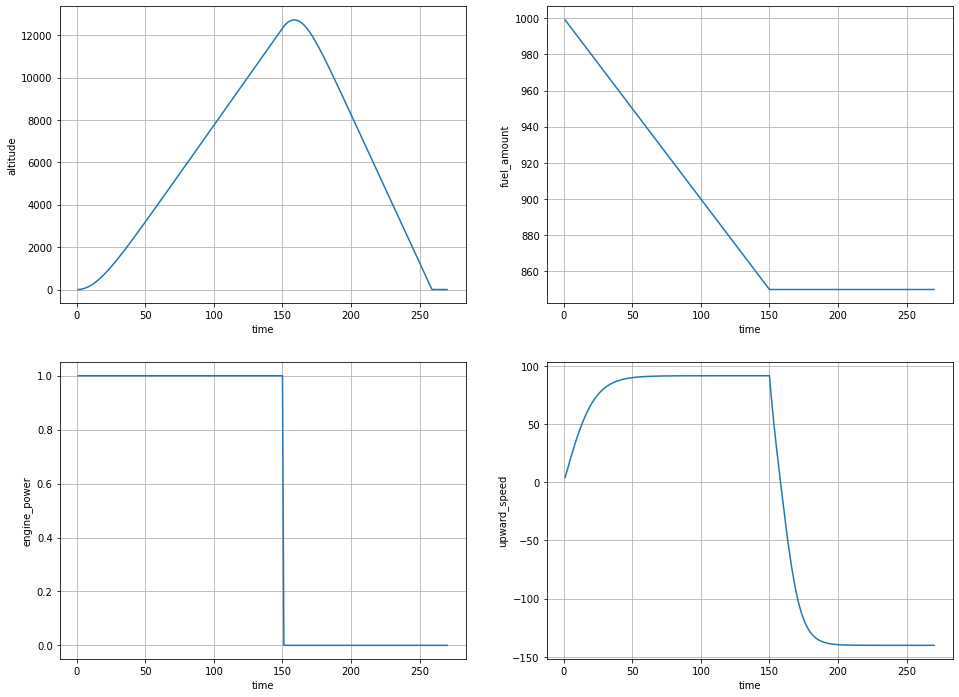

In [17]:
summarize_flight()

**Think you can beat your time? Try again!**

#Task #3: Let a computer control the rocket

Here is an example of how you could tell the engine what to do, based on the altitude. It will set the engine power to 1 if the altitude is less than 20,000, 0.8 if it is less than 30,000 and 0.65 if above 30,000. Run this code below to see how this plan works to control the engine.

<u>Video for Task #3</u>



Stayed within 1,000 m of 30,000 m for 570.0 seconds.


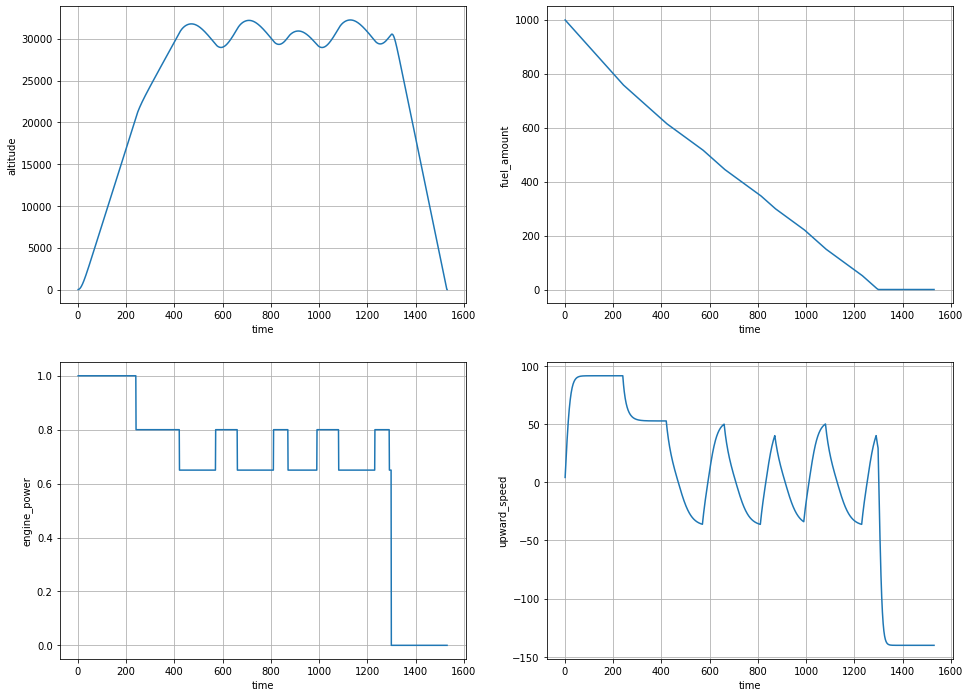

In [18]:
def control_engine(time, altitude, upward_speed, fuel_amount):
    if altitude < 20_000:
        return 1
    elif altitude < 30_000:
        return 0.8
    else:
        return 0.65

fly_rocket()
summarize_flight()

**Your task: Modify the code in the first cell of Task #3 above to try to beat this time! What is the best time you can get?**

Resource: <u>Video for Task #3</u>

#Task #4: Add one more piece of data to your computer rocket controller

In Task #3, the contoller only looked at the altitude of the rocket, but the computer has access to a lot more information! It has access to time, altitude, upward_speed and fuel_amount. Use at least one more variable (such as upward_speed) into your controller!

<u>Video for Task #4</u>



Stayed within 1,000 m of 30,000 m for 464.0 seconds.


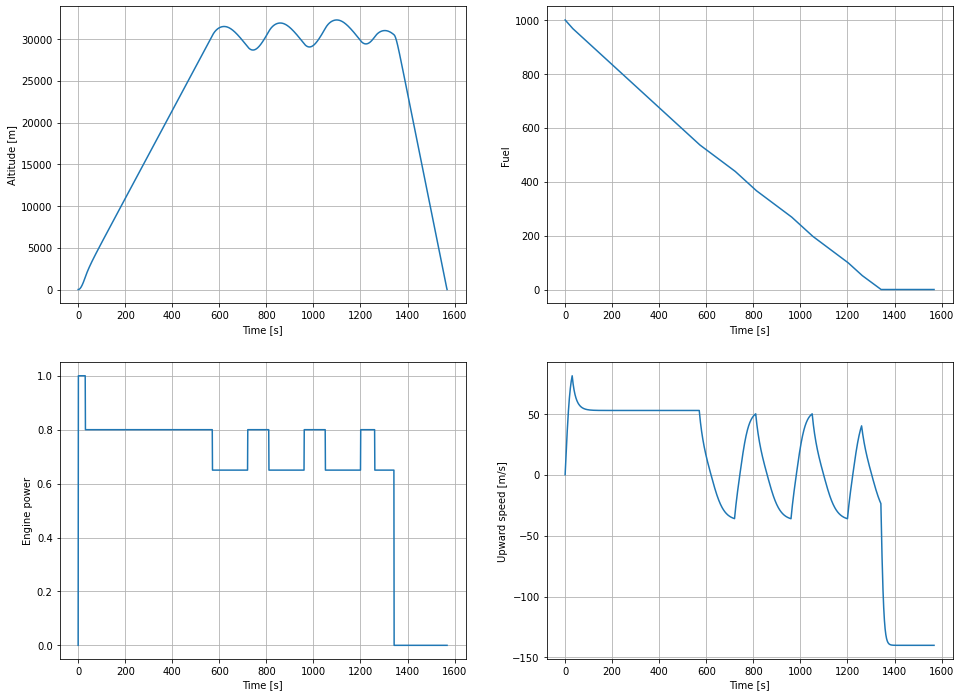

In [ ]:
def control_engine(time, altitude, upward_speed, fuel_amount):
    if altitude < 20_000 and upward_speed<30:
        return 1
    elif altitude < 30_000:
        return 0.8
    else:
        return 0.65

fly_rocket()
summarize_flight()

**Your task: Modify the code in the first cell of Task #4 above to try to beat your best time! What is the best time you can get?**

Resource: <u>Video for Task #4</u>